In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import os, sys, json, cv2

import matplotlib.pyplot as plt
import seaborn as sns

import urllib.request
import pandas as pd

from PIL import Image
from sklearn import datasets
import shutil

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
%cd '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'

/content/drive/.shortcut-targets-by-id/1jUKAAmQZHvuqK8JiowWkvggYEh6efL-y/3조/Dog_Pic/학습할 이미지/닥스훈트


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1jUKAAmQZHvuqK8JiowWkvggYEh6efL-y/3조/Dog_Pic/학습할 이미지/닥스훈트


In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'

# 학습 이미지 경로
nor_path = os.path.join(base_dir, '닥스훈트_정상')
fat_path = os.path.join(base_dir, '닥스훈트_비만')

nor_list = os.listdir(nor_path)
fat_list = os.listdir(fat_path)
print(len(nor_list))
print(len(fat_list))

700
301


# SET

## SET1 이미지크기, 선명도, 스케일링

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트'


set_path = os.path.join(base_dir, 'set_1')  # 해당하는 이미지 세트 폴더 생성
# os.mkdir( set_path )
nor_path = os.path.join(set_path, '전처리_정상')
# os.mkdir( nor_path )
fat_path = os.path.join(set_path, '전처리_비만')
# os.mkdir( fat_path )

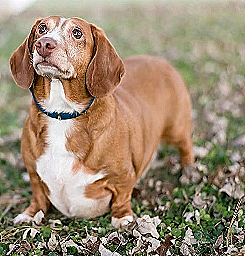

In [ ]:
image = cv2.imread('/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/validation/fat/fat_150.jpg')
dst = cv2.resize(image, dsize=(245,256))
# 커널을 만듭니다.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(dst, -1, kernel)

# 이미지 출력
cv2_imshow(image_sharp)

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in nor_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    nor_path = os.path.join(base_dir, '닥스훈트_정상')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(nor_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256), interpolation=cv2.INTER_AREA)
    # 이미지 전처리 : 선명하게
    # 커널을 만듭니다.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    img_sharp = cv2.filter2D(dst, -1, kernel)
    # sacling
    img_sharp = img_sharp / 255
    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_1/전처리_정상/{i}.jpg', img_sharp)
    i += 1

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in fat_list:
    # 기존 학습할 이미지 폴더의 비만 이미지들
    fat_path = os.path.join(base_dir, '닥스훈트_비만')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(fat_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256), interpolation=cv2.INTER_AREA)
    # 이미지 전처리 : 선명하게
    # 커널을 만듭니다.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    img_sharp = cv2.filter2D(dst, -1, kernel)
    # sacling
    img_sharp = img_sharp / 255
    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_1/전처리_비만/{i}.jpg', img_sharp)
    i += 1

In [ ]:
len(os.listdir(fat_path))

## SET2 이미지크기, 선명도, 대비향상, 스케일링

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/'


set_path = os.path.join(base_dir, 'set_2')  # 해당하는 이미지 세트 폴더 생성
# os.mkdir( set_path )
nor_path = os.path.join(set_path, '전처리_정상')
os.mkdir( nor_path )
fat_path = os.path.join(set_path, '전처리_비만')
os.mkdir( fat_path )

In [ ]:
len(os.listdir(fat_path))

0

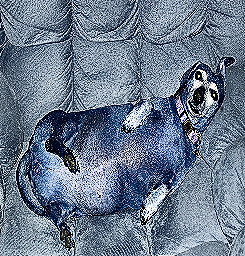

In [ ]:
image = cv2.imread('/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/닥스훈트_비만/007.jpg')
dst = cv2.resize(image, dsize=(245,256))
# 커널을 만듭니다.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(dst, -1, kernel)

image_yuv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿉니다.

# 이미지 출력
cv2_imshow(image_rgb)

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in nor_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    nor_path = os.path.join(base_dir, '닥스훈트_정상')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(nor_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256), interpolation=cv2.INTER_AREA)
    # 이미지 전처리 : 선명하게
    # 커널을 만듭니다.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    image_sharp = cv2.filter2D(dst, -1, kernel)

    image_yuv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
    image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿉니다.

    # sacling
    image_rgb = image_rgb / 255

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_2/전처리_정상/{i}.jpg', image_rgb)
    i += 1

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in fat_list:
    # 기존 학습할 이미지 폴더의 비만 이미지들
    fat_path = os.path.join(base_dir, '닥스훈트_비만')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(fat_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256), interpolation=cv2.INTER_AREA)
    # 이미지 전처리 : 선명하게
    # 커널을 만듭니다.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    image_sharp = cv2.filter2D(dst, -1, kernel)

    image_yuv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
    image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿉니다.

    # sacling
    image_rgb = image_rgb / 255

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_2/전처리_비만/{i}.jpg', image_rgb)
    i += 1

## SET3 이미지 크기, 흑백, 선명도, 대비향상, 이진화, 스케일링

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/'


set_path = os.path.join(base_dir, 'set_3')  # 해당하는 이미지 세트 폴더 생성
# os.mkdir( set_path )
nor_path = os.path.join(set_path, '전처리_정상')
# os.mkdir( nor_path )
fat_path = os.path.join(set_path, '전처리_비만')
# os.mkdir( fat_path )

In [ ]:
len(os.listdir(nor_path))

700

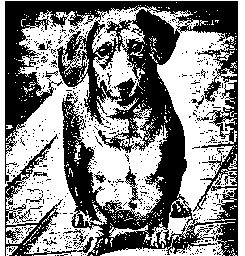

In [ ]:
image = cv2.imread('/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/닥스훈트_비만/008.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.resize(image, dsize=(245,256))
# 커널을 만듭니다.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(dst, -1, kernel)

image_enhanced = cv2.equalizeHist(image_sharp)

# 이진화
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_enhanced, max_output_value,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                         neighborhood_size, subtract_from_mean) # 적응적 임계처리를 적용

# 이미지 출력
cv2_imshow(image_binarized)

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in nor_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    nor_path = os.path.join(base_dir, '닥스훈트_정상')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(nor_path + '/' +img, cv2.IMREAD_GRAYSCALE)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256), interpolation=cv2.INTER_AREA)
    # 이미지 전처리 : 선명하게
    # 커널을 만듭니다.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    image_sharp = cv2.filter2D(dst, -1, kernel)

    image_enhanced = cv2.equalizeHist(image_sharp)

    max_output_value = 255
    neighborhood_size = 99
    subtract_from_mean = 10
    image_binarized = cv2.adaptiveThreshold(image_enhanced, max_output_value,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                         neighborhood_size, subtract_from_mean)

    # sacling
    image_binarized = image_binarized / 255

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_3/전처리_정상/{i}.jpg', image_binarized)
    i += 1

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in fat_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    fat_path = os.path.join(base_dir, '닥스훈트_비만')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(fat_path + '/' +img, cv2.IMREAD_GRAYSCALE)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256), interpolation=cv2.INTER_AREA)
    # 이미지 전처리 : 선명하게
    # 커널을 만듭니다.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    image_sharp = cv2.filter2D(dst, -1, kernel)

    image_enhanced = cv2.equalizeHist(image_sharp)

    max_output_value = 255
    neighborhood_size = 99
    subtract_from_mean = 10
    image_binarized = cv2.adaptiveThreshold(image_enhanced, max_output_value,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                         neighborhood_size, subtract_from_mean)

    # sacling
    image_binarized = image_binarized / 255

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_3/전처리_비만/{i}.jpg', image_binarized)
    i += 1

## SET4 이미지크기, 대비향상(RGB적용X), 스케일링

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/'


set_path = os.path.join(base_dir, 'set_4')  # 해당하는 이미지 세트 폴더 생성
# os.mkdir( set_path )
nor_path = os.path.join(set_path, '전처리_정상')
os.mkdir( nor_path )
fat_path = os.path.join(set_path, '전처리_비만')
# os.mkdir( fat_path )

In [ ]:
len(os.listdir(fat_path))

301

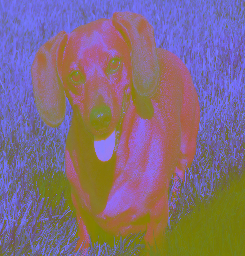

In [ ]:
image = cv2.imread('/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/닥스훈트_비만/010.jpg')
dst = cv2.resize(image, dsize=(245,256))

image_yuv = cv2.cvtColor(dst, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용

# 이미지 출력
cv2_imshow(image_yuv)

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in nor_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    nor_path = os.path.join(base_dir, '닥스훈트_정상')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(nor_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256))

    image_yuv = cv2.cvtColor(dst, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용

    # sacling
    image_yuv = image_yuv / 255

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_4/전처리_정상/{i}.jpg', image_yuv)
    i += 1

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in fat_list:
    # 기존 학습할 이미지 폴더의 비만 이미지들
    fat_path = os.path.join(base_dir, '닥스훈트_비만')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(fat_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256))

    image_yuv = cv2.cvtColor(dst, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용

    # sacling
    image_yuv = image_yuv / 255

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_4/전처리_비만/{i}.jpg', image_yuv)
    i += 1

## SET5 이미지크기, 양방향필터, 이진화, 스케일링

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/'


set_path = os.path.join(base_dir, 'set_5')  # 해당하는 이미지 세트 폴더 생성
# os.mkdir( set_path )
nor_path = os.path.join(set_path, '전처리_정상')
# os.mkdir( nor_path )
fat_path = os.path.join(set_path, '전처리_비만')
# os.mkdir( fat_path )

In [ ]:
len(os.listdir(fat_path))

301

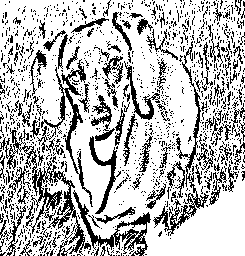

In [ ]:
image = cv2.imread('/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/닥스훈트_비만/010.jpg',cv2.COLOR_BGR2RGB)
dst = cv2.resize(image, dsize=(245,256))
#https://pintelligence.tistory.com/23
blur_bilateral = cv2.bilateralFilter(dst, 11, 75, 75)
gray = cv2.cvtColor(blur_bilateral, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255,
         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 7)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)

cv2_imshow(thresh)

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in nor_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    nor_path = os.path.join(base_dir, '닥스훈트_정상')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(nor_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256))

    blur_bilateral = cv2.bilateralFilter(dst, 11, 75, 75)
    gray = cv2.cvtColor(blur_bilateral, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(gray, 255,
             cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 7)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
    # sacling
    thresh = thresh / 255

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_5/전처리_정상/{i}.jpg', thresh)
    i += 1

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in fat_list:
    # 기존 학습할 이미지 폴더의 비만 이미지들
    fat_path = os.path.join(base_dir, '닥스훈트_비만')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(fat_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256))

    blur_bilateral = cv2.bilateralFilter(dst, 11, 75, 75)
    gray = cv2.cvtColor(blur_bilateral, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(gray, 255,
             cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 7)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
    # sacling
    thresh = thresh / 255

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_5/전처리_비만/{i}.jpg', thresh)
    i += 1

## SET6 대비향상(YUV 적용), 선명도, 이미지크기x, 스케일링x

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/'


set_path = os.path.join(base_dir, 'set_6')  # 해당하는 이미지 세트 폴더 생성
# os.mkdir( set_path )
nor_path = os.path.join(set_path, '전처리_정상')
os.mkdir( nor_path )
fat_path = os.path.join(set_path, '전처리_비만')
# os.mkdir( fat_path )

In [ ]:
len(os.listdir(nor_path))

700

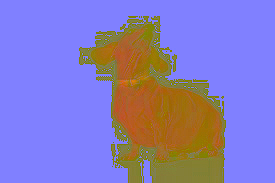

In [ ]:
image = cv2.imread('/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/닥스훈트_비만/003.jpg')

image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용

# 커널을 만듭니다.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

image_sharp = cv2.filter2D(image_yuv, -1, kernel)

# 이미지 출력
cv2_imshow(image_sharp)

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in nor_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    nor_path = os.path.join(base_dir, '닥스훈트_정상')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(nor_path + '/' +img)
    if(type(src) == type(None)):
      pass
    else:
      image_yuv = cv2.cvtColor(src, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
    
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])

    # 이미지를 선명하게 만듭니다.
    image_sharp = cv2.filter2D(image_yuv, -1, kernel)

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_6/전처리_정상/{i}.jpg', image_sharp)
    i += 1

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in fat_list:
    # 기존 학습할 이미지 폴더의 비만 이미지들
    fat_path = os.path.join(base_dir, '닥스훈트_비만')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(fat_path + '/' +img)
    if(type(src) == type(None)):
      pass
    else:
      image_yuv = cv2.cvtColor(src, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
    
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])

    # 이미지를 선명하게 만듭니다.
    image_sharp = cv2.filter2D(image_yuv, -1, kernel)

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_6/전처리_비만/{i}.jpg', image_sharp)
    i += 1

## SET7 이미지크기, 배경제거(높이150), 스케일링x

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/'


set_path = os.path.join(base_dir, 'set_7')  # 해당하는 이미지 세트 폴더 생성
# os.mkdir( set_path )
nor_path = os.path.join(set_path, '전처리_정상')
os.mkdir( nor_path )
fat_path = os.path.join(set_path, '전처리_비만')
# os.mkdir( fat_path )

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in nor_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    nor_path = os.path.join(base_dir, '닥스훈트_정상')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(nor_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256))

    rectangle = (0, 56, 256, 150)
    
    mask = np.zeros(dst.shape[:2],np.uint8)
    
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    cv2.grabCut(dst,mask,rectangle,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    background = dst*mask2[:,:,np.newaxis]

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_7/전처리_정상/{i}.jpg', background)
    i += 1

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in fat_list:
    # 기존 학습할 이미지 폴더의 비만 이미지들
    fat_path = os.path.join(base_dir, '닥스훈트_비만')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(fat_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256))

    rectangle = (0, 56, 256, 150)
    
    mask = np.zeros(dst.shape[:2],np.uint8)
    
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    cv2.grabCut(dst,mask,rectangle,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    background = dst*mask2[:,:,np.newaxis]

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_7/전처리_비만/{i}.jpg', background)
    i += 1

## SET8 이미지크기, 선명도, 배경제거(높이180), 스케일링x

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/'


set_path = os.path.join(base_dir, 'set_8')  # 해당하는 이미지 세트 폴더 생성
# os.mkdir( set_path )
nor_path = os.path.join(set_path, '전처리_정상')
#os.mkdir( nor_path )
fat_path = os.path.join(set_path, '전처리_비만')
#os.mkdir( fat_path )

In [ ]:
len(os.listdir(nor_path))

695

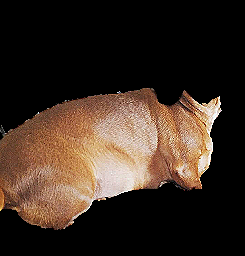

In [ ]:
image = cv2.imread('/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/닥스훈트_비만/100.jpg')
dst = cv2.resize(image, dsize=(245,256))

# 커널을 만듭니다.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

image_sharp = cv2.filter2D(dst, -1, kernel)

#배경제거
rectangle = (0, 56, 256, 180)
mask = np.zeros(image_sharp.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

cv2.grabCut(image_sharp,mask,rectangle,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
background = image_sharp*mask2[:,:,np.newaxis]

cv2_imshow(background)

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in nor_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    nor_path = os.path.join(base_dir, '닥스훈트_정상')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(nor_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256))

    # 커널을 만듭니다.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    
    image_sharp = cv2.filter2D(dst, -1, kernel)
    
    #배경제거
    rectangle = (0, 56, 256, 180)
    mask = np.zeros(image_sharp.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    cv2.grabCut(image_sharp,mask,rectangle,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    background = image_sharp*mask2[:,:,np.newaxis]

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_8/전처리_정상/{i}.jpg', background)
    i += 1

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트'
for img in fat_list:
    # 기존 학습할 이미지 폴더의 비만 이미지들
    fat_path = os.path.join(base_dir, '닥스훈트_비만')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(fat_path + '/' +img)
    # 이미지 크기 변경
    if(type(src) == type(None)):
      pass
    else:
      dst = cv2.resize(src, dsize = (245, 256))

    # 커널을 만듭니다.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    
    image_sharp = cv2.filter2D(dst, -1, kernel)
    
    #배경제거
    rectangle = (0, 56, 256, 180)
    mask = np.zeros(image_sharp.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    cv2.grabCut(image_sharp,mask,rectangle,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    background = image_sharp*mask2[:,:,np.newaxis]

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_8/전처리_비만/{i}.jpg', background)
    i += 1

## SET9 - 정방형자르기, 대비향상(YUV 적용), 선명도, 스케일링x

In [ ]:
base_path = '/content/drive/MyDrive/3조/김소영/이미지/자른이미지'

nor_path = os.path.join(base_path, '정상')
fat_path = os.path.join(base_path, '비만')

nor_list = os.listdir(nor_path)
fat_list = os.listdir(fat_path)

print(len(nor_list))
print(len(fat_list))

698
299


In [ ]:
sample_img = cv2.imread(f'{nor_path}/{nor_list[1]}')
sample_img.shape

(434, 600, 3)

In [ ]:
# 정상 사진
w_array = []
h_array = []
for img_name in nor_list:
    img = cv2.imread(f'{nor_path}/{img_name}')
    if img is not None:
      w_array.append(img.shape[0])
      h_array.append(img.shape[1])

print(len(nor_list), len(w_array), len(h_array))

nor_df = pd.DataFrame({'width' : w_array, 'height' : h_array})

nor_df

700 698 698


,width,height
0,471,512
1,434,600
2,600,800
3,210,280
4,186,280
...,...,...
693,206,244
694,300,300
695,208,243
696,154,200


In [ ]:
import os, sys, json, cv2
import pandas as pd
import numpy as np

# trim 함수  (정방형으로 잘라오기)
def trim_images(name, file_path, save_path):
    i = 1
    for img_name in os.listdir(file_path):
        image = cv2.imread(f'{file_path}/{img_name}')
        if image is not None:
          # width & height of a image
          h, w = image.shape[0], image.shape[1]
          # The center of a image
          X, Y = int(w/2), int(h/2)

          # 폭 > 높이 : 가로 방향
          if w > h:
              # slice
              img_trim = image[ : ,  X-int(h/2) : X+int(h/2)  ]

          # 폭 < 높이 : 세로 방향
          elif w < h:
              # slice
              img_trim = image[  Y-int(w/2) : Y+int(w/2)  , : ]

          # 폭 = 높이 : 정방형
          else:
              img_trim = image

          cv2.imwrite(f'{save_path}/square_{name}_{i}.jpg',img_trim)
          i += 1

# # 정상
name = 'nor'
nor_file_path = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/닥스훈트_정상'
nor_save_path = '/content/drive/MyDrive/3조/김소영/이미지/자른이미지/정상'
trim_images(name, nor_file_path, nor_save_path)

# 비만
name = 'fat'
fat_file_path ='/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/닥스훈트_비만'
fat_save_path = '/content/drive/MyDrive/3조/김소영/이미지/자른이미지/비만'
trim_images(name, fat_file_path, fat_save_path)

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/'


set_path = os.path.join(base_dir, 'set_9')  # 해당하는 이미지 세트 폴더 생성
# os.mkdir( set_path )
nor_path = os.path.join(set_path, '전처리_정상')
os.mkdir( nor_path )
fat_path = os.path.join(set_path, '전처리_비만')
# os.mkdir( fat_path 

In [ ]:
len(os.listdir(nor_path))

698

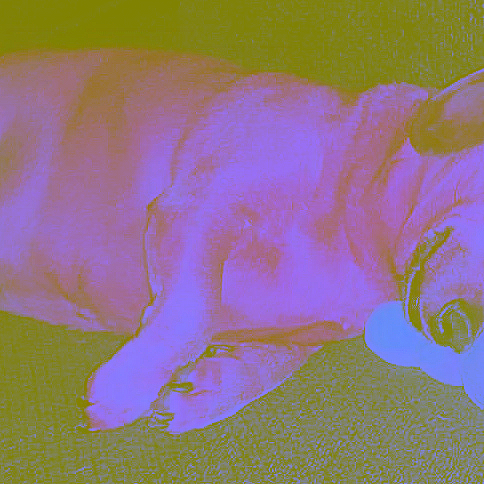

In [ ]:
image = cv2.imread('/content/drive/MyDrive/3조/김소영/이미지/자른이미지/비만/square_fat_299.jpg')

image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용

# 커널을 만듭니다.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

image_sharp = cv2.filter2D(image_yuv, -1, kernel)

# 이미지 출력
cv2_imshow(image_sharp)

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/김소영/이미지/자른이미지'
for img in nor_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    nor_path = os.path.join(base_dir, '정상')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(nor_path + '/' +img)
    if(type(src) == type(None)):
      pass
    else:
      image_yuv = cv2.cvtColor(src, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
    
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])

    # 이미지를 선명하게 만듭니다.
    image_sharp = cv2.filter2D(image_yuv, -1, kernel)

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_9/전처리_정상/{i}.jpg', image_sharp)
    i += 1

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/김소영/이미지/자른이미지'
for img in fat_list:
    # 기존 학습할 이미지 폴더의 비만 이미지들
    fat_path = os.path.join(base_dir, '비만')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(fat_path + '/' +img)
    if(type(src) == type(None)):
      pass
    else:
      image_yuv = cv2.cvtColor(src, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
    
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])

    # 이미지를 선명하게 만듭니다.
    image_sharp = cv2.filter2D(image_yuv, -1, kernel)

    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_9/전처리_비만/{i}.jpg', image_sharp)
    i += 1

## SET10

### 이미지자르기

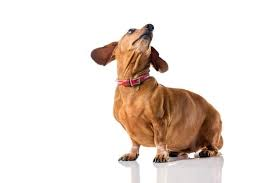

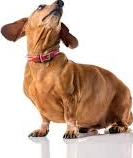

In [ ]:
image = cv2.imread('/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/닥스훈트_비만/003.jpg', )
blur = cv2.GaussianBlur(image, ksize=(5,5), sigmaX=0)
edged = cv2.Canny(blur, 10, 250)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0
contours_xy = np.array(contours)
contours_xy.shape
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)

x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

img_trim = image[y:y+h, x:x+w]

cv2_imshow(image)
cv2_imshow(img_trim)


### 정사각형

In [ ]:
import time
import os
from PIL import Image
import sys

print("Process Start.")

start_time = time.time()

# 사진이 저장된 폴더명 입력
directory = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/닥스훈트/닥스훈트_비만'

# 사진의 배경 색깔을 입력
background_color = '#FFFFFF'

# 결과물 폴더
out_dir ='/content/drive/MyDrive/3조/김소영/이미지/비만'

input_files = os.listdir(directory)

for filename in input_files:
    exp = filename.strip().split('.')[-1]
    if exp not in "JPG jpg JPEG jpeg PNG png BMP bmp":
        continue

    image = Image.open(directory + "/" + filename)

    # 이미지의 크기를 알아냅니다. (언패킹)
    Xdim, Ydim = image.size

    # 정사각형으로 만들어 주기 위한 연산이 필요합니다.
    # X축과 Y축 중 어느 길이가 더 긴지 알아냅니다.
    if Xdim > Ydim:
        # X축 길이가 더 길 경우의 계산입니다.
        new_size = Xdim
        x_offset = 0
        y_offset = int((Xdim - Ydim) / 2)
    else:
        # Y축 길이가 더 길 경우의 계산입니다.
        new_size = Ydim
        x_offset = int((Ydim - Xdim) / 2)
        y_offset = 0

    # 새로운 이미지를 생성합니다. 텅 빈 정사각형이고 색깔은 background_color 입니다.
    new_image = Image.new("RGB", (new_size, new_size), background_color)

    # 텅 빈 배경에 원본 이미지를 덮어씌웁니다. 적당한 위치에 말이죠.
    new_image.paste(image, (x_offset, y_offset))

    new_image.save(out_dir + "/" + filename)

    image.close()
    new_image.close()


print("Process Done.")

end_time = time.time()
print("The Job Took " + str(end_time - start_time) + " seconds.")
    

Process Start.
Process Done.
The Job Took 19.21975827217102 seconds.


# 폴더 저장

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_8'

# # 훈련셋, 검증셋, 테스트셋을 미리 분할하기 위한 폴더 경로
train_path = os.path.join(base_dir, 'train')
os.mkdir( train_path)

val_path = os.path.join(base_dir, 'validation')
os.mkdir( val_path)

test_path = os.path.join(base_dir, 'test')
os.mkdir( test_path)


# # train 정상 폴더
train_nor_path = os.path.join(train_path, 'nor')
os.mkdir( train_nor_path) # 폴더 생성

# # train 비만 폴더
train_fat_path = os.path.join(train_path, 'fat')
os.mkdir( train_fat_path)

# # validation 정상 폴더
val_nor_path = os.path.join(val_path, 'nor')
os.mkdir( val_nor_path)

# # validation 비만 폴더
val_fat_path = os.path.join(val_path, 'fat')
os.mkdir( val_fat_path)

# # test 정상 폴더
test_nor_path = os.path.join(test_path, 'nor')
os.mkdir( test_nor_path)

# # test 비만 폴더
test_fat_path = os.path.join(test_path, 'fat')
os.mkdir( test_fat_path)

In [ ]:
import shutil
# 여기서 nor_list와 fat_list는 전처리가 진행된 이미지를 의미합니다
nor_path = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_8/전처리_정상'
nor_list = os.listdir(nor_path)
fat_path = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/닥스훈트/set_8/전처리_비만'
fat_list = os.listdir(fat_path)

In [ ]:
# train용 이미지 복사
for i in range(0, int(len(nor_list)*0.5)):
  src_path = os.path.join(nor_path, nor_list[i])                 # 원본 파일 경로
  dst_path = os.path.join(train_nor_path, f'nor_{i}.jpg')        # 복사할 파일 경로
  shutil.copyfile( src_path, dst_path )

for i in range(0, int(len(fat_list)*0.5)):
  src_path = os.path.join(fat_path, fat_list[i])        
  dst_path = os.path.join(train_fat_path, f'fat_{i}.jpg')   
  shutil.copyfile( src_path, dst_path )

# validation용 이미지 복사
for i in range(int(len(nor_list)*0.5), int(len(nor_list)*0.75)):
  src_path = os.path.join(nor_path, nor_list[i])        
  dst_path = os.path.join(val_nor_path, f'nor_{i}.jpg')   
  shutil.copyfile( src_path, dst_path )

for i in range(int(len(fat_list)*0.5), int(len(fat_list)*0.75)):
  src_path = os.path.join(fat_path, fat_list[i])        
  dst_path = os.path.join(val_fat_path, f'fat_{i}.jpg')   
  shutil.copyfile( src_path, dst_path )

# test용 이미지 복사
for i in range(int(len(nor_list)*0.75), len(nor_list)):
  src_path = os.path.join(nor_path, nor_list[i])        
  dst_path = os.path.join(test_nor_path, f'nor_{i}.jpg')   
  shutil.copyfile( src_path, dst_path )

for i in range(int(len(fat_list)*0.75), len(fat_list)):
  src_path = os.path.join(fat_path, fat_list[i])        
  dst_path = os.path.join(test_fat_path, f'fat_{i}.jpg')   
  shutil.copyfile( src_path, dst_path )

In [ ]:
print(f'train set : {len(os.listdir(train_nor_path)) + len(os.listdir(train_fat_path))}')
print(f'validation set : {len(os.listdir(val_nor_path)) + len(os.listdir(val_fat_path))}')
print(f'test set : {len(os.listdir(test_nor_path)) + len(os.listdir(test_fat_path))}')
print(f'total set : {len(nor_list) + len(fat_list)}')

train set : 500
validation set : 250
test set : 251
total set : 1001
